In [1]:
%matplotlib inline
import sys
sys.path.append('../manual')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from logistic import LogisticLayer
from losses import CrossEntropyLoss

true_W = np.array([[-2., 3.]])
true_b = -1.
epoch = 1000
batch_size = 124
alpha = 0.01

In [3]:
def sigmoid(x):
    return 1. / (1. + np.power(np.e, -x))


def generate_batch(batch_size):
    X_data = 10 * np.random.rand(true_W.shape[1], batch_size) - 5
    y_data = sigmoid(true_W.dot(X_data) + 2. * np.random.random_sample() - 1. + true_b) # add noise
    return X_data, y_data

In [4]:
def train_model(lr: LogisticLayer, loss):
    for i in range(epoch):
        X_data, y_data = generate_batch(batch_size)
        step_loss = loss(lr(X_data), y_data)
        dW, db = lr.backwards(loss.backwards())
        lr.W -= alpha * dW
        lr.b -= alpha * db


def evaluate_model(lr: LogisticLayer):
    X_data, y_data = generate_batch(100)
    y, y_hat = np.round(y_data), np.round(lr(X_data))
    acc = 1 - 1 / y.size * np.sum(np.abs(y - y_hat))
    return acc, X_data, y_data

In [5]:
lr = LogisticLayer(2)
loss = CrossEntropyLoss()

train_model(lr, loss)
acc, X_data, y_data = evaluate_model(lr)
print(f"Estimated W: {lr.W}")
print(f"Estimated b: {lr.b}")
print(f"Resulting accuracy: {acc}")

Estimated W: [[-0.87042739  1.36326457]]
Estimated b: 0.05425821882680155
Resulting accuracy: 0.89


In [6]:
r = pd.concat([pd.DataFrame(X_data.T, columns=["X1", "X2"]), np.round(pd.DataFrame(y_data.T))], axis=1)
ones = r[r.iloc[:, 2] == 1.]
zeroes = r[r.iloc[:, 2] == 0.]
domain = np.linspace(r["X1"].min(), r["X1"].max(), 100)
ones.shape, zeroes.shape

((44, 3), (56, 3))

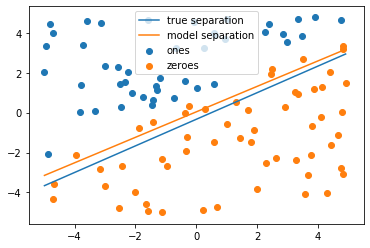

In [7]:
# there is missmatch due to noise in true prediction
plt.scatter(ones.iloc[:, 0], ones.iloc[:, 1], label="ones")
plt.scatter(zeroes.iloc[:, 0], zeroes.iloc[:, 1], label="zeroes")
plt.plot(domain, -domain*true_W[0][0]/true_W[0][1] + true_b/true_W[0][1], label="true separation")
plt.plot(domain, -domain*lr.W[0][0]/lr.W[0][1] + lr.b/lr.W[0][1], label="model separation")
plt.legend(loc="best")
plt.show()